## Importar librerias

In [78]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import shapiro, levene, kruskal, ttest_ind, f_oneway
#from tabulate import tabulate

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Deep Learning Libraries
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, BatchNormalization

import warnings
warnings.filterwarnings("ignore")

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [80]:
df=pd.read_csv("/Users/dmc/Trabajo 2025/MOCA /repository/MOCA/file/input/parkinsons_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.620,0,5.108,1.381,3.894,9.283,0,0,0,0,0,0,129,60,222.842,148.126,37.868,337.307,6.459,29.181,1.572,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247,1,6.028,8.410,8.513,5.602,0,0,0,0,0,0,163,76,210.501,153.756,77.228,264.636,37.307,12.333,4.788,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368,0,2.242,0.213,6.499,9.930,0,0,0,1,0,0,113,93,287.388,118.703,85.588,395.663,67.838,29.928,2.131,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.455,0,5.998,1.375,6.715,4.196,0,0,0,0,0,0,146,78,280.340,136.299,51.870,362.190,52.965,21.304,3.391,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616,0,9.775,1.189,4.658,9.364,0,0,0,0,0,0,115,94,284.014,108.449,25.069,149.957,21.805,8.336,3.201,0,0,0,1,0,1,0,0,DrXXXConfid


In [81]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (2105, 35)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
PatientID,int64,0,0.000,0,2105,2105,3058.000,5162.000,4110.000,607.805,3058,3059,3060
Age,int64,0,0.000,0,40,2105,50.000,89.000,69.602,11.595,85,75,70
Gender,int64,0,0.000,0,2,2105,0.000,1.000,0.493,0.500,0,0,1
Ethnicity,int64,0,0.000,0,4,2105,0.000,3.000,0.693,1.004,3,0,0
EducationLevel,int64,0,0.000,0,4,2105,0.000,3.000,1.337,0.896,1,2,0
BMI,float64,0,0.000,0,2105,2105,15.008,40.000,27.209,7.208,19.620,16.247,15.368
Smoking,int64,0,0.000,0,2,2105,0.000,1.000,0.296,0.457,0,1,0
AlcoholConsumption,float64,0,0.000,0,2105,2105,0.002,19.989,10.040,5.687,5.108,6.028,2.242
PhysicalActivity,float64,0,0.000,0,2105,2105,0.004,9.995,5.017,2.891,1.381,8.410,0.213
DietQuality,float64,0,0.000,0,2105,2105,0.000,9.996,4.913,2.872,3.894,8.513,6.499


In [82]:
data = df.copy()
data.drop(columns=["PatientID", "Ethnicity","UPDRS","FunctionalAssessment","DoctorInCharge"], inplace=True)
data.dropna(inplace=True)
data.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MoCA,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,1,19.620,0,5.108,1.381,3.894,9.283,0,0,0,0,0,0,129,60,222.842,148.126,37.868,337.307,29.181,1,0,0,0,0,0,0,0
1,75,0,2,16.247,1,6.028,8.410,8.513,5.602,0,0,0,0,0,0,163,76,210.501,153.756,77.228,264.636,12.333,0,1,0,1,0,1,0,1
2,70,1,0,15.368,0,2.242,0.213,6.499,9.930,0,0,0,1,0,0,113,93,287.388,118.703,85.588,395.663,29.928,1,0,0,0,1,0,1,1
3,52,0,0,15.455,0,5.998,1.375,6.715,4.196,0,0,0,0,0,0,146,78,280.340,136.299,51.870,362.190,21.304,1,1,1,0,0,0,1,1
4,87,0,1,18.616,0,9.775,1.189,4.658,9.364,0,0,0,0,0,0,115,94,284.014,108.449,25.069,149.957,8.336,0,0,0,1,0,1,0,0


In [83]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 2105
Variables: 30
cat_cols: 17
num_cols: 13
cat_but_car: 0
num_but_cat: 17


In [84]:
cat_cols, num_cols, cat_but_car

(['Gender',
  'EducationLevel',
  'Smoking',
  'FamilyHistoryParkinsons',
  'TraumaticBrainInjury',
  'Hypertension',
  'Diabetes',
  'Depression',
  'Stroke',
  'Tremor',
  'Rigidity',
  'Bradykinesia',
  'PosturalInstability',
  'SpeechProblems',
  'SleepDisorders',
  'Constipation',
  'Diagnosis'],
 ['Age',
  'BMI',
  'AlcoholConsumption',
  'PhysicalActivity',
  'DietQuality',
  'SleepQuality',
  'SystolicBP',
  'DiastolicBP',
  'CholesterolTotal',
  'CholesterolLDL',
  'CholesterolHDL',
  'CholesterolTriglycerides',
  'MoCA'],
 [])

# EDA

        Gender  Ratio
Gender               
0         1068 50.736
1         1037 49.264


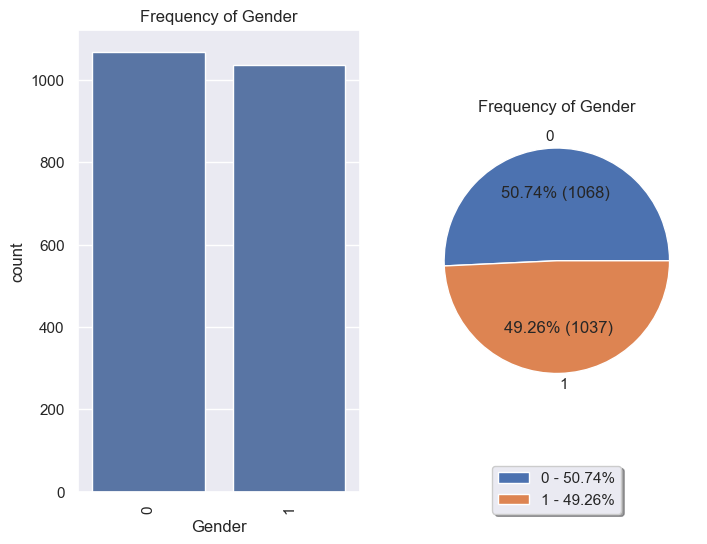

                EducationLevel  Ratio
EducationLevel                       
1                          840 39.905
2                          656 31.164
0                          388 18.432
3                          221 10.499


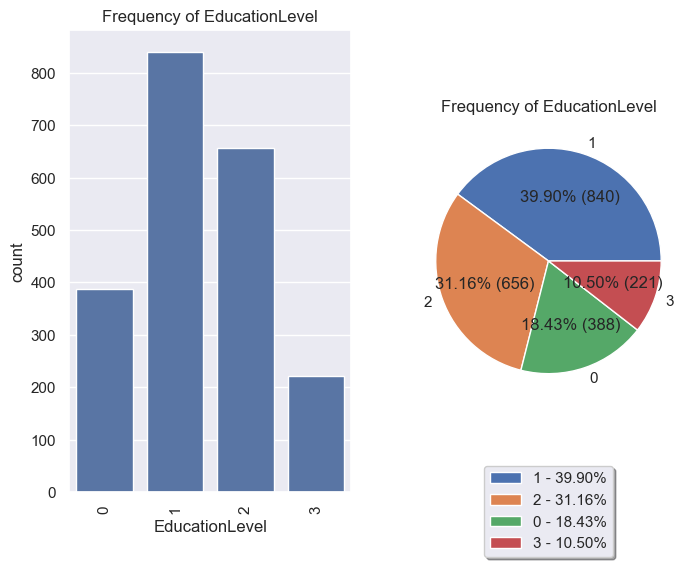

         Smoking  Ratio
Smoking                
0           1481 70.356
1            624 29.644


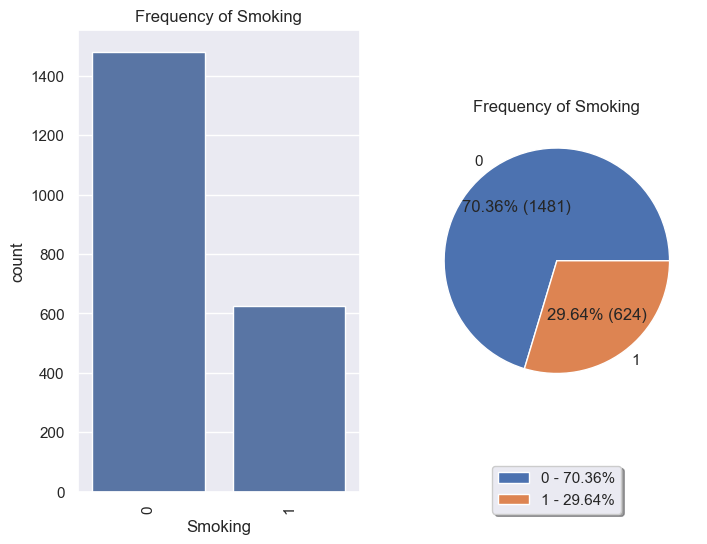

                         FamilyHistoryParkinsons  Ratio
FamilyHistoryParkinsons                                
0                                           1798 85.416
1                                            307 14.584


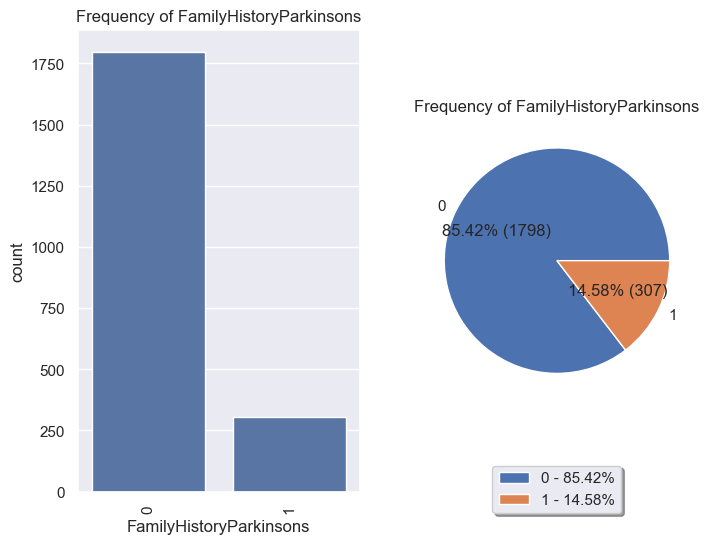

                      TraumaticBrainInjury  Ratio
TraumaticBrainInjury                             
0                                     1881 89.359
1                                      224 10.641


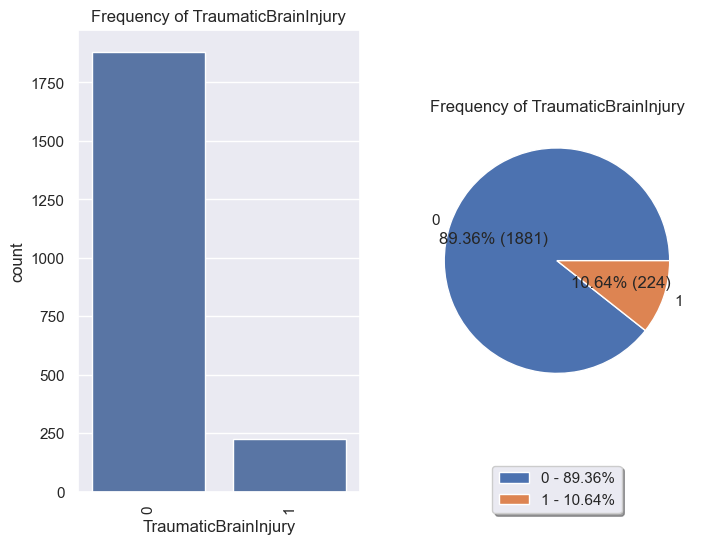

              Hypertension  Ratio
Hypertension                     
0                     1798 85.416
1                      307 14.584


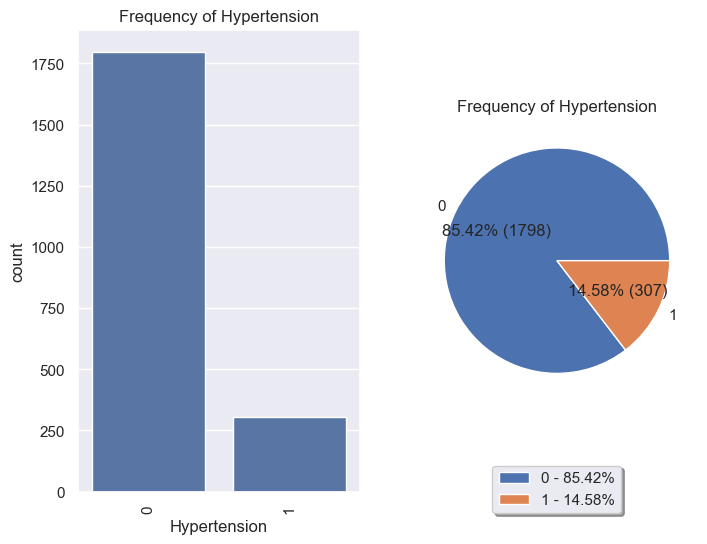

          Diabetes  Ratio
Diabetes                 
0             1793 85.178
1              312 14.822


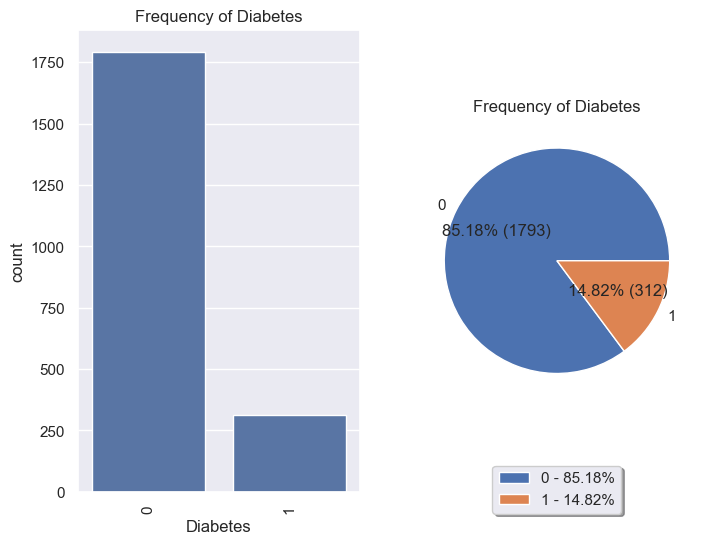

            Depression  Ratio
Depression                   
0                 1673 79.477
1                  432 20.523


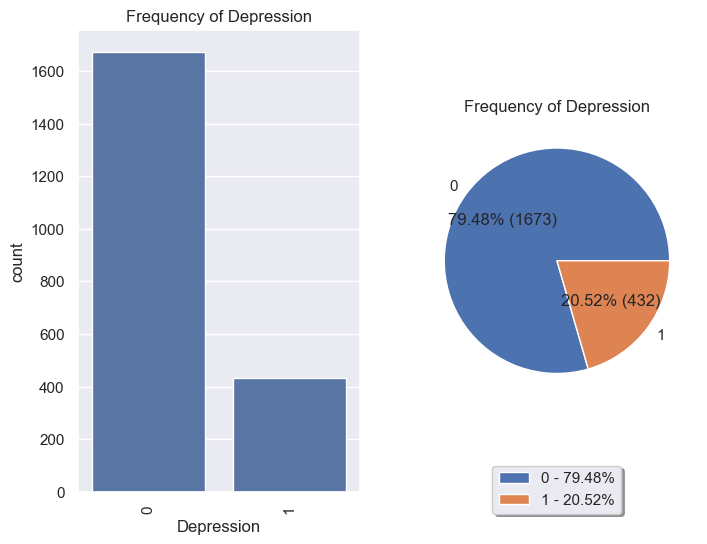

        Stroke  Ratio
Stroke               
0         2002 95.107
1          103  4.893


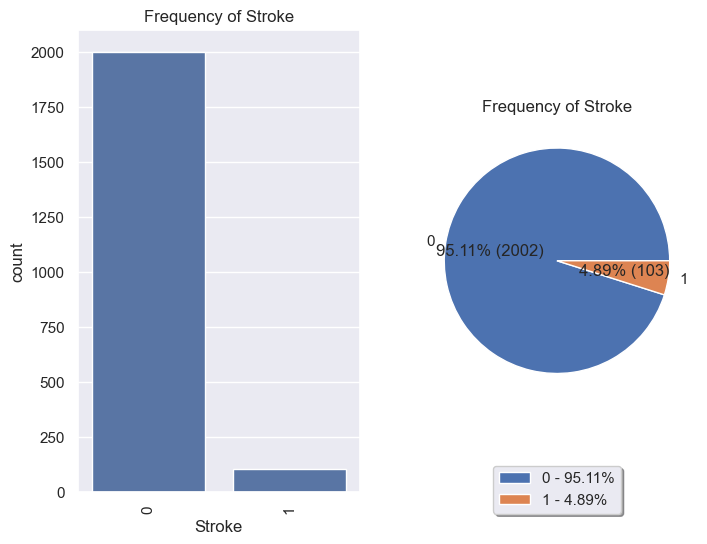

        Tremor  Ratio
Tremor               
0         1196 56.817
1          909 43.183


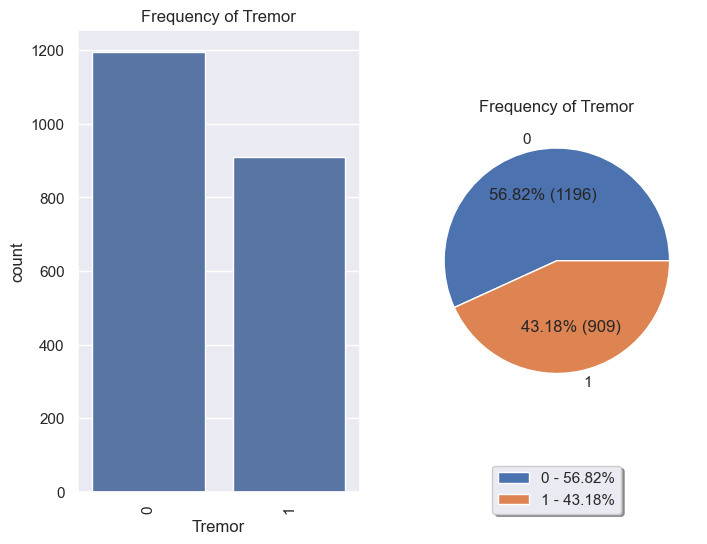

          Rigidity  Ratio
Rigidity                 
0             1573 74.727
1              532 25.273


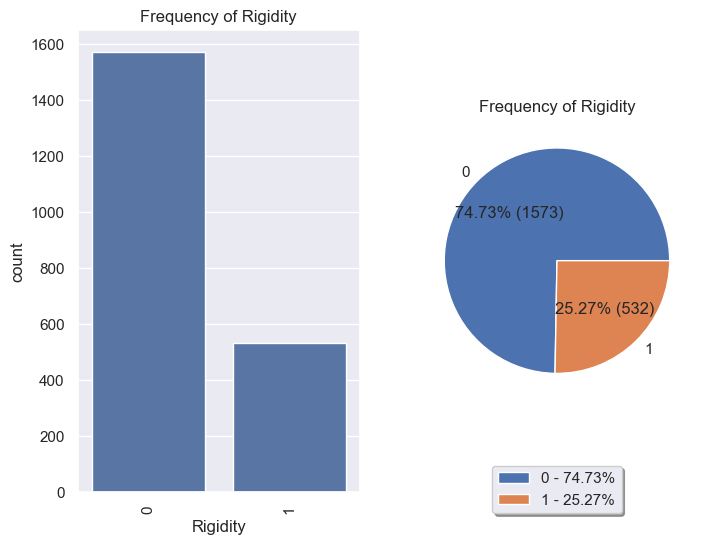

              Bradykinesia  Ratio
Bradykinesia                     
0                     1668 79.240
1                      437 20.760


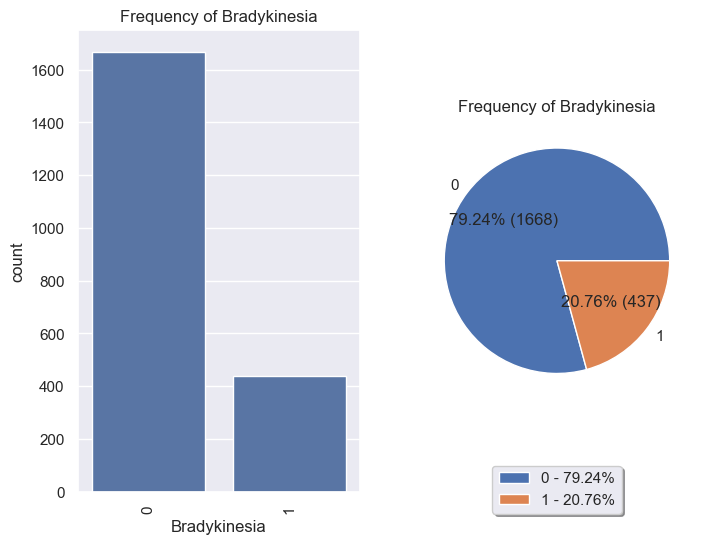

                     PosturalInstability  Ratio
PosturalInstability                            
0                                   1813 86.128
1                                    292 13.872


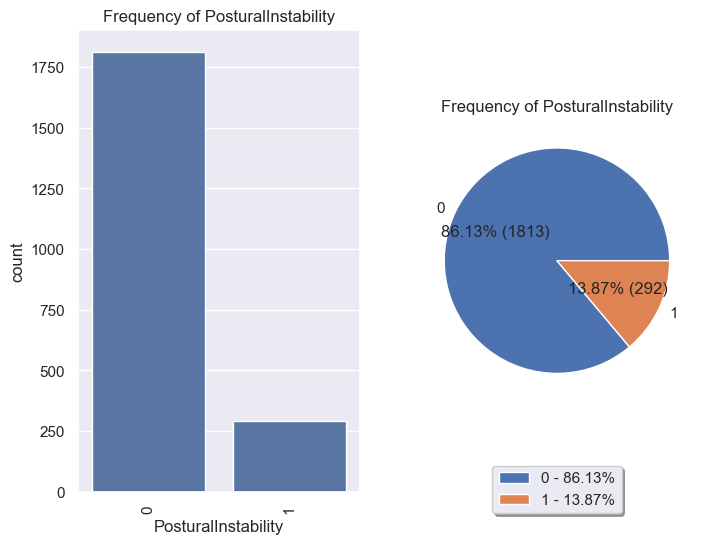

                SpeechProblems  Ratio
SpeechProblems                       
0                         1484 70.499
1                          621 29.501


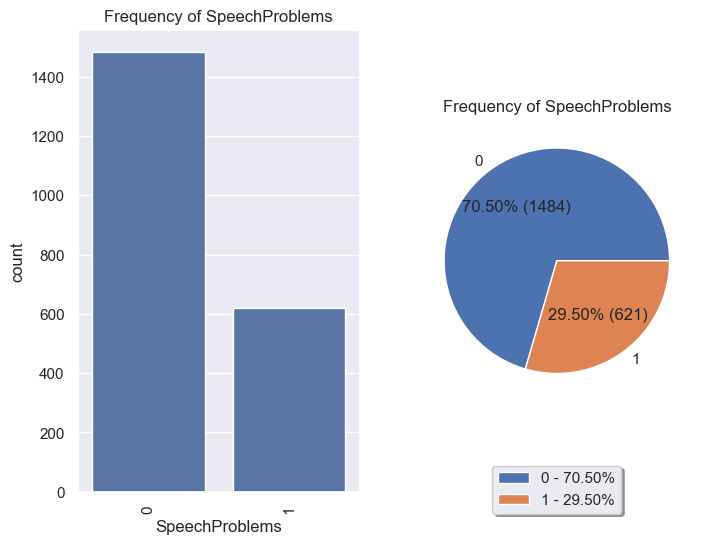

                SleepDisorders  Ratio
SleepDisorders                       
0                         1589 75.487
1                          516 24.513


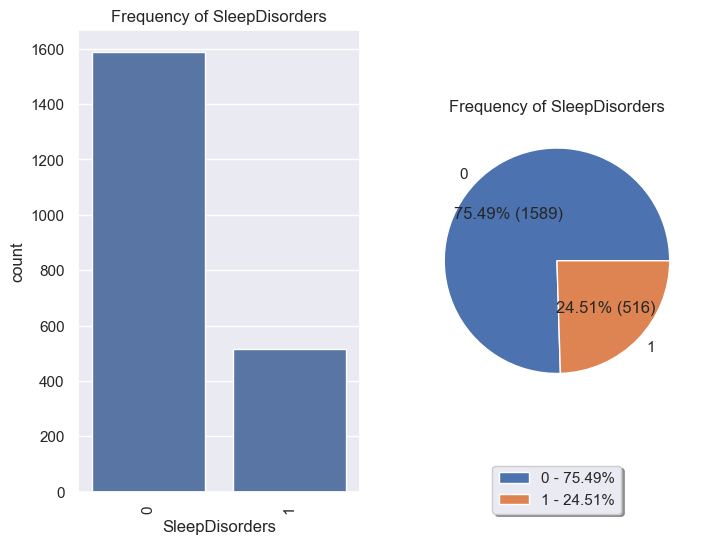

              Constipation  Ratio
Constipation                     
0                     1480 70.309
1                      625 29.691


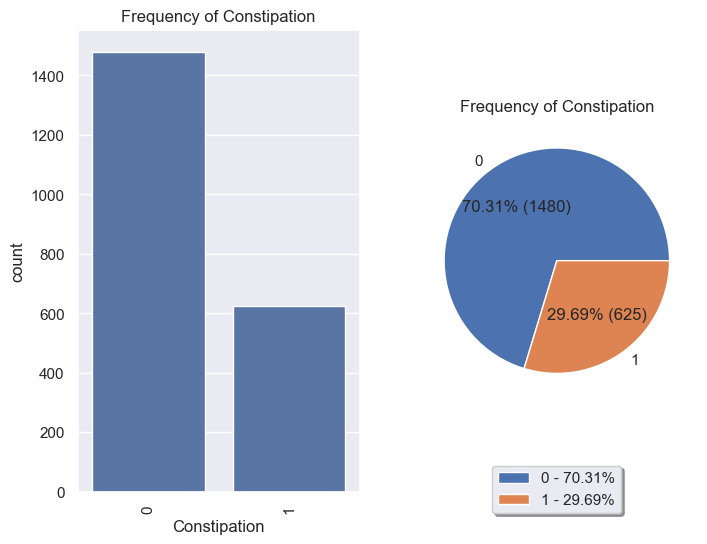

           Diagnosis  Ratio
Diagnosis                  
1               1304 61.948
0                801 38.052


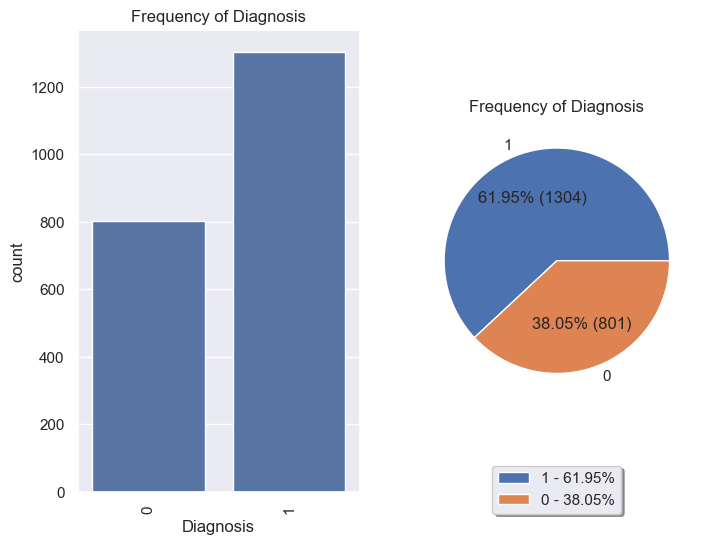

In [85]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(data, col, True)

Age
count   2105.000
mean      69.602
std       11.595
min       50.000
5%        51.000
10%       53.000
20%       57.000
30%       62.000
40%       66.000
50%       70.000
60%       74.000
70%       77.000
80%       82.000
90%       86.000
95%       88.000
99%       89.000
max       89.000
Name: Age, dtype: float64


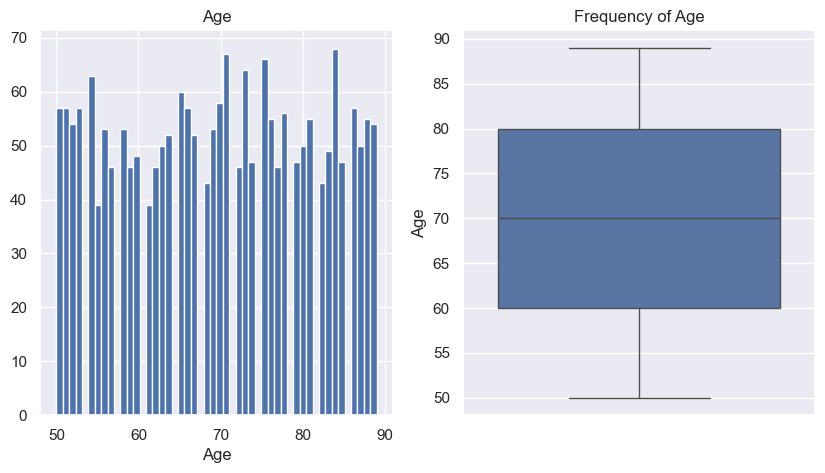

______________________________________________________

BMI
count   2105.000
mean      27.209
std        7.208
min       15.008
5%        16.108
10%       17.494
20%       19.670
30%       22.177
40%       24.424
50%       27.185
60%       29.756
70%       32.199
80%       34.723
90%       37.079
95%       38.574
99%       39.705
max       40.000
Name: BMI, dtype: float64


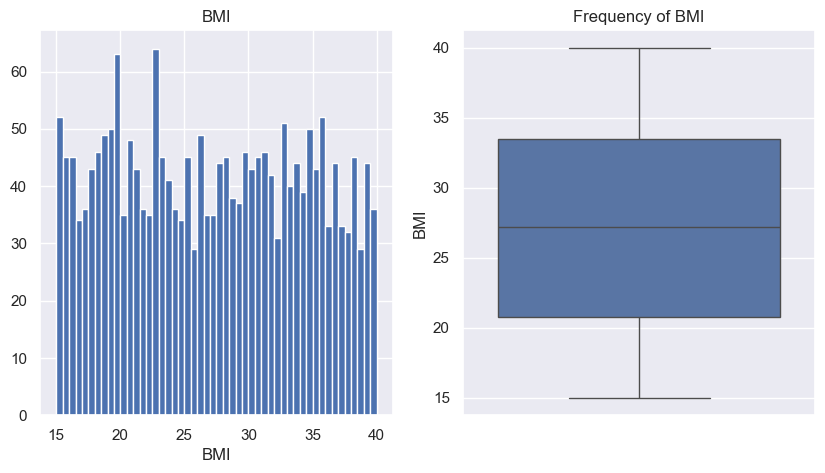

______________________________________________________

AlcoholConsumption
count   2105.000
mean      10.040
std        5.687
min        0.002
5%         1.085
10%        2.224
20%        4.138
30%        6.078
40%        7.950
50%       10.070
60%       12.252
70%       13.890
80%       15.759
90%       17.913
95%       18.880
99%       19.747
max       19.989
Name: AlcoholConsumption, dtype: float64


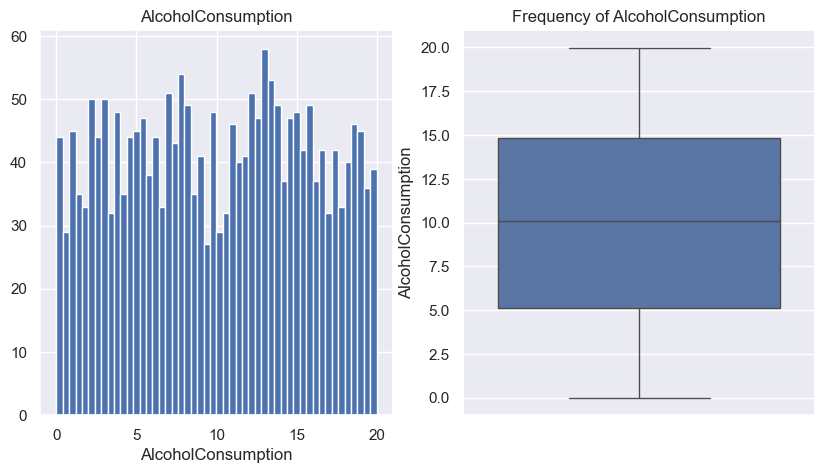

______________________________________________________

PhysicalActivity
count   2105.000
mean       5.017
std        2.891
min        0.004
5%         0.575
10%        1.104
20%        2.048
30%        2.893
40%        3.934
50%        5.032
60%        5.985
70%        7.011
80%        8.063
90%        9.045
95%        9.489
99%        9.889
max        9.995
Name: PhysicalActivity, dtype: float64


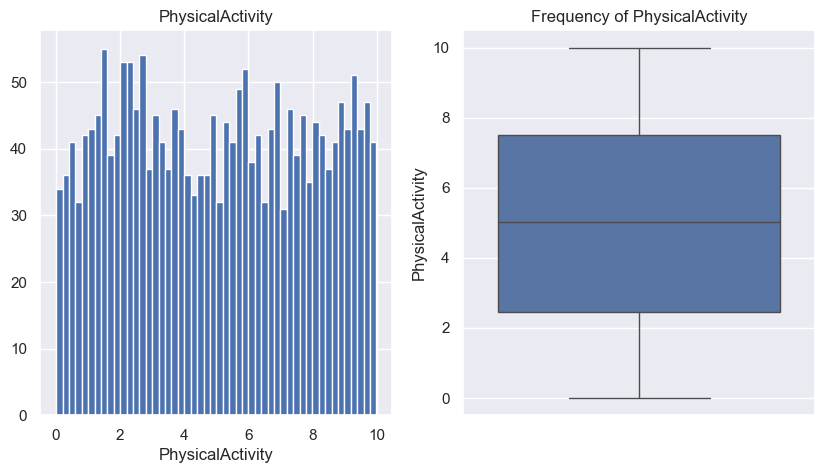

______________________________________________________

DietQuality
count   2105.000
mean       4.913
std        2.872
min        0.000
5%         0.467
10%        0.928
20%        1.959
30%        2.955
40%        3.877
50%        4.825
60%        5.852
70%        6.868
80%        7.885
90%        8.914
95%        9.452
99%        9.901
max        9.996
Name: DietQuality, dtype: float64


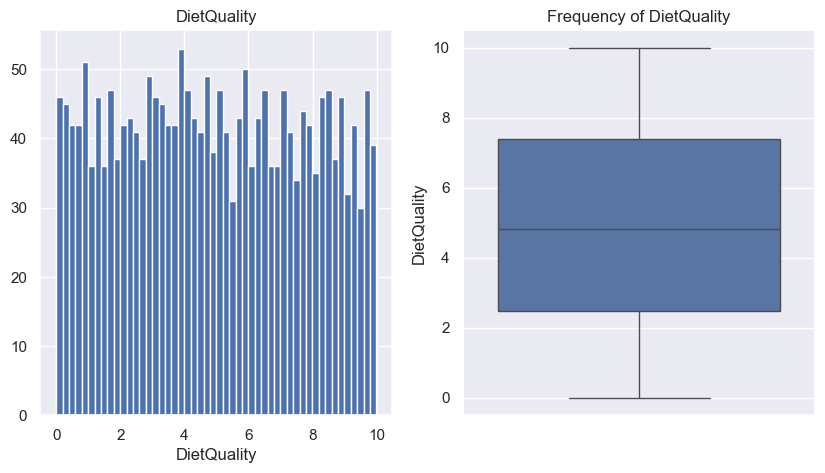

______________________________________________________

SleepQuality
count   2105.000
mean       6.997
std        1.753
min        4.000
5%         4.254
10%        4.541
20%        5.206
30%        5.786
40%        6.368
50%        6.930
60%        7.607
70%        8.257
80%        8.847
90%        9.418
95%        9.700
99%        9.941
max       10.000
Name: SleepQuality, dtype: float64


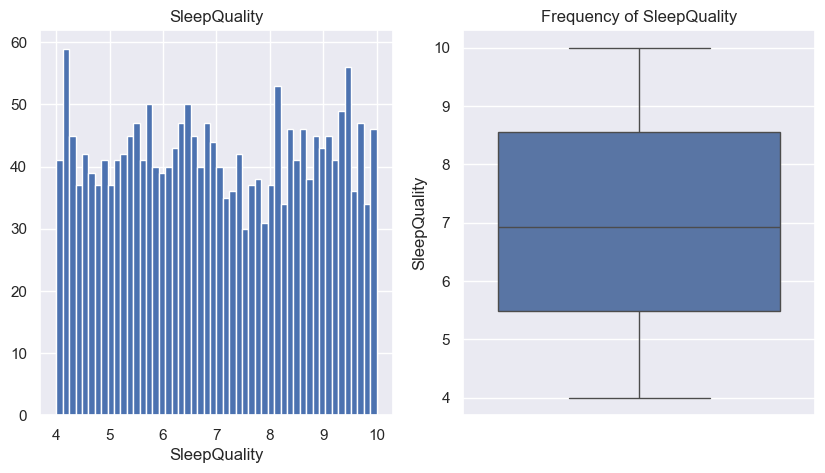

______________________________________________________

SystolicBP
count   2105.000
mean     133.720
std       26.502
min       90.000
5%        94.000
10%       97.400
20%      105.000
30%      115.000
40%      124.000
50%      133.000
60%      143.000
70%      152.000
80%      162.000
90%      171.000
95%      175.000
99%      179.000
max      179.000
Name: SystolicBP, dtype: float64


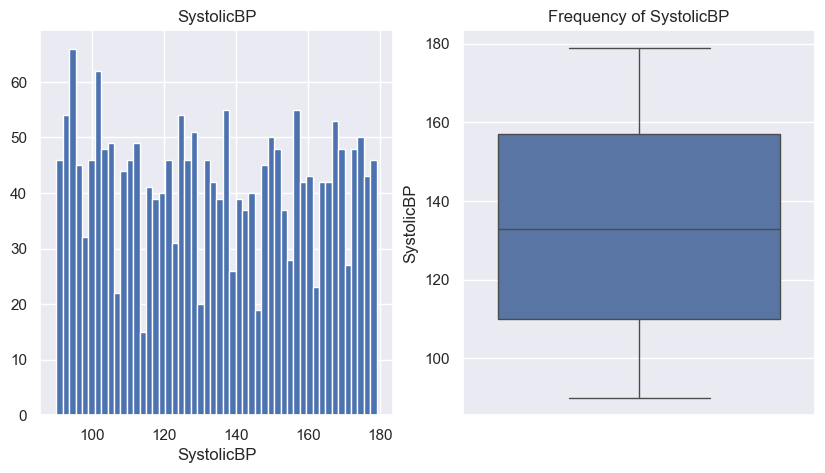

______________________________________________________

DiastolicBP
count   2105.000
mean      90.250
std       17.061
min       60.000
5%        63.000
10%       66.000
20%       72.000
30%       79.000
40%       85.000
50%       91.000
60%       96.000
70%      102.000
80%      108.000
90%      113.000
95%      116.000
99%      119.000
max      119.000
Name: DiastolicBP, dtype: float64


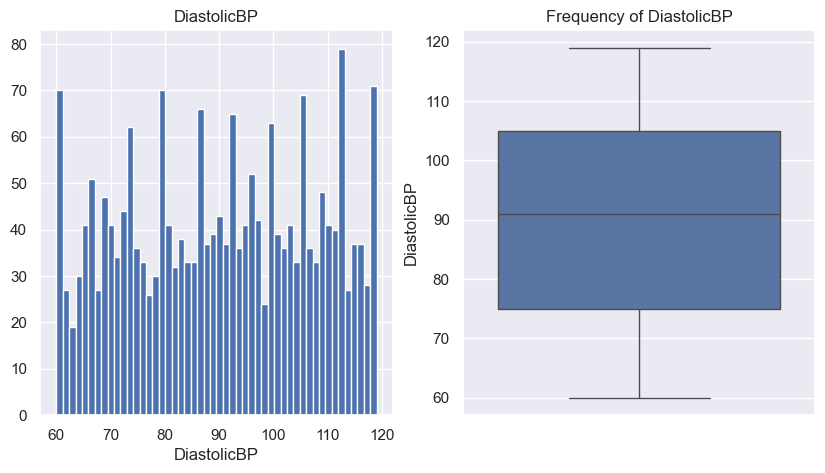

______________________________________________________

CholesterolTotal
count   2105.000
mean     226.861
std       43.589
min      150.063
5%       157.359
10%      165.797
20%      181.048
30%      197.805
40%      212.541
50%      228.528
60%      242.283
70%      257.794
80%      272.030
90%      286.461
95%      293.105
99%      298.939
max      299.963
Name: CholesterolTotal, dtype: float64


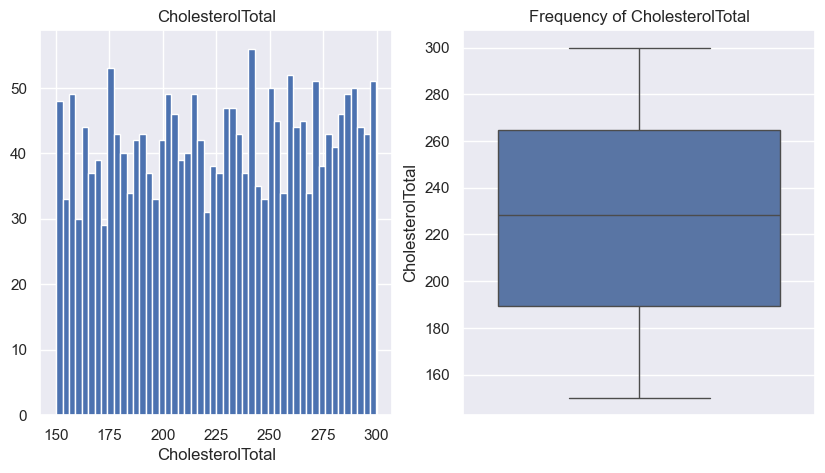

______________________________________________________

CholesterolLDL
count   2105.000
mean     126.148
std       43.407
min       50.023
5%        58.013
10%       66.682
20%       81.030
30%       95.390
40%      111.319
50%      126.885
60%      141.268
70%      155.826
80%      171.094
90%      186.198
95%      193.239
99%      198.731
max      199.986
Name: CholesterolLDL, dtype: float64


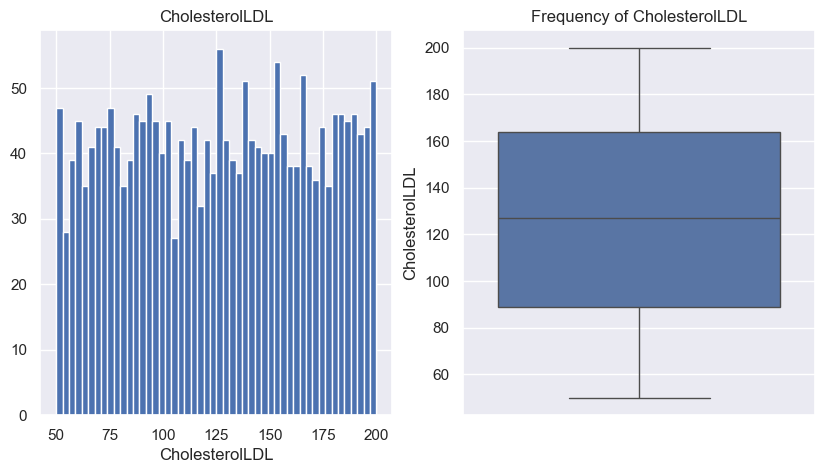

______________________________________________________

CholesterolHDL
count   2105.000
mean      59.670
std       23.371
min       20.028
5%        23.242
10%       26.828
20%       34.974
30%       43.975
40%       52.027
50%       59.343
60%       67.960
70%       75.263
80%       83.168
90%       92.622
95%       96.619
99%       99.301
max       99.982
Name: CholesterolHDL, dtype: float64


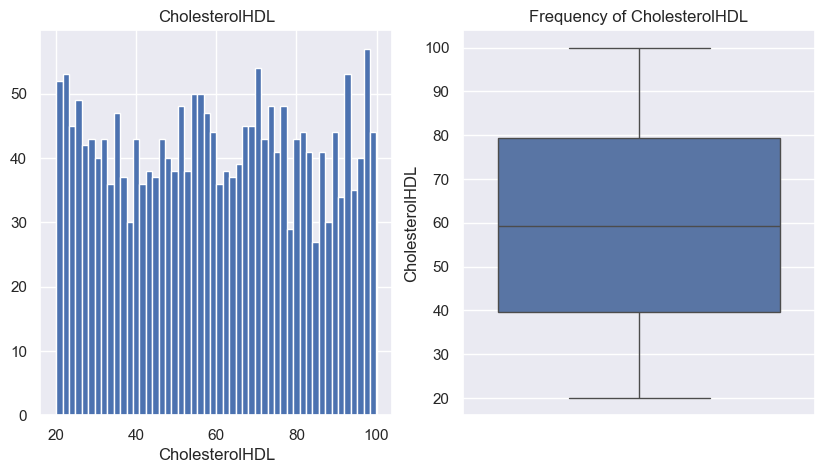

______________________________________________________

CholesterolTriglycerides
count   2105.000
mean     222.940
std      101.896
min       50.114
5%        66.072
10%       82.543
20%      116.358
30%      150.851
40%      187.861
50%      222.802
60%      256.720
70%      292.550
80%      329.196
90%      365.561
95%      382.751
99%      397.305
max      399.975
Name: CholesterolTriglycerides, dtype: float64


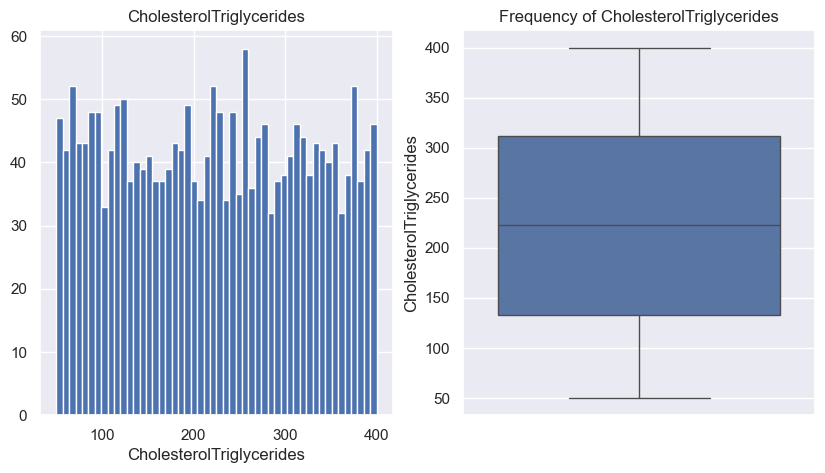

______________________________________________________

MoCA
count   2105.000
mean      15.094
std        8.643
min        0.021
5%         1.622
10%        3.040
20%        6.318
30%        9.082
40%       11.985
50%       14.964
60%       18.453
70%       21.369
80%       23.906
90%       26.904
95%       28.407
99%       29.546
max       29.970
Name: MoCA, dtype: float64


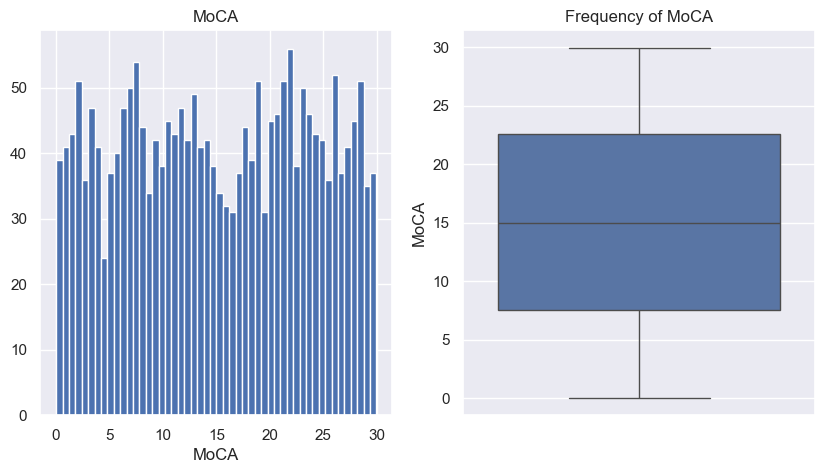

______________________________________________________



In [86]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(data, col, plot=True)

In [87]:

def plot_stacked_histograms(dataframe, cols_per_row=5, figsize=(20, 25)):
    """
    Grafica histogramas/barras apiladas por 'Diagnosis' (0 y 1) en una cuadrícula 6x5.
    
    Parámetros:
    -----------
    dataframe : pd.DataFrame
        DataFrame con los datos (incluye columna 'Diagnosis' con valores 0 y 1).
    cols_per_row : int, optional
        Columnas por fila (por defecto 5).
    figsize : tuple, optional
        Tamaño de la figura (ancho, alto).
    """
    # Verificar si existe la columna 'Diagnosis'
    if 'Diagnosis' not in dataframe.columns:
        raise ValueError("El DataFrame debe contener la columna 'Diagnosis' (valores 0 y 1).")
    
    # Filtrar columnas a graficar (excluyendo 'Diagnosis' si está en la lista)
    columns = [col for col in dataframe.columns if col != 'Diagnosis']
    total_plots = len(columns)
    rows = (total_plots // cols_per_row) + (1 if total_plots % cols_per_row != 0 else 0)
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=figsize)
    fig.suptitle("Distribución apilada por Diagnosis (0: Rojo, 1: Azul)", fontsize=16, y=1.02)
    
    # Aplanar axes para acceso fácil
    axes_flat = axes.flatten() if total_plots > 1 else [axes]
    
    for i, col in enumerate(columns):
        ax = axes_flat[i]
        
        # Gráfico de barras apiladas para categóricas
        if dataframe[col].dtype == 'object':
            # Contar frecuencias por Diagnosis y columna
            cross_tab = pd.crosstab(dataframe[col], dataframe['Diagnosis'])
            cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['tomato', 'skyblue'])
        
        # Histograma apilado para numéricas
        else:
            sns.histplot(
                data=dataframe,
                x=col,
                hue='Diagnosis',
                multiple='stack',
                ax=ax,
                palette=['tomato', 'skyblue'],
                edgecolor='white'
            )
        
        ax.set_title(col, fontsize=12)
        ax.set_xlabel("")
        ax.legend(title='Diagnosis', labels=['0', '1'])
        ax.tick_params(axis='x', rotation=45)
    
    # Ocultar ejes vacíos
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].axis('off')
    
    plt.tight_layout()
    plt.show()

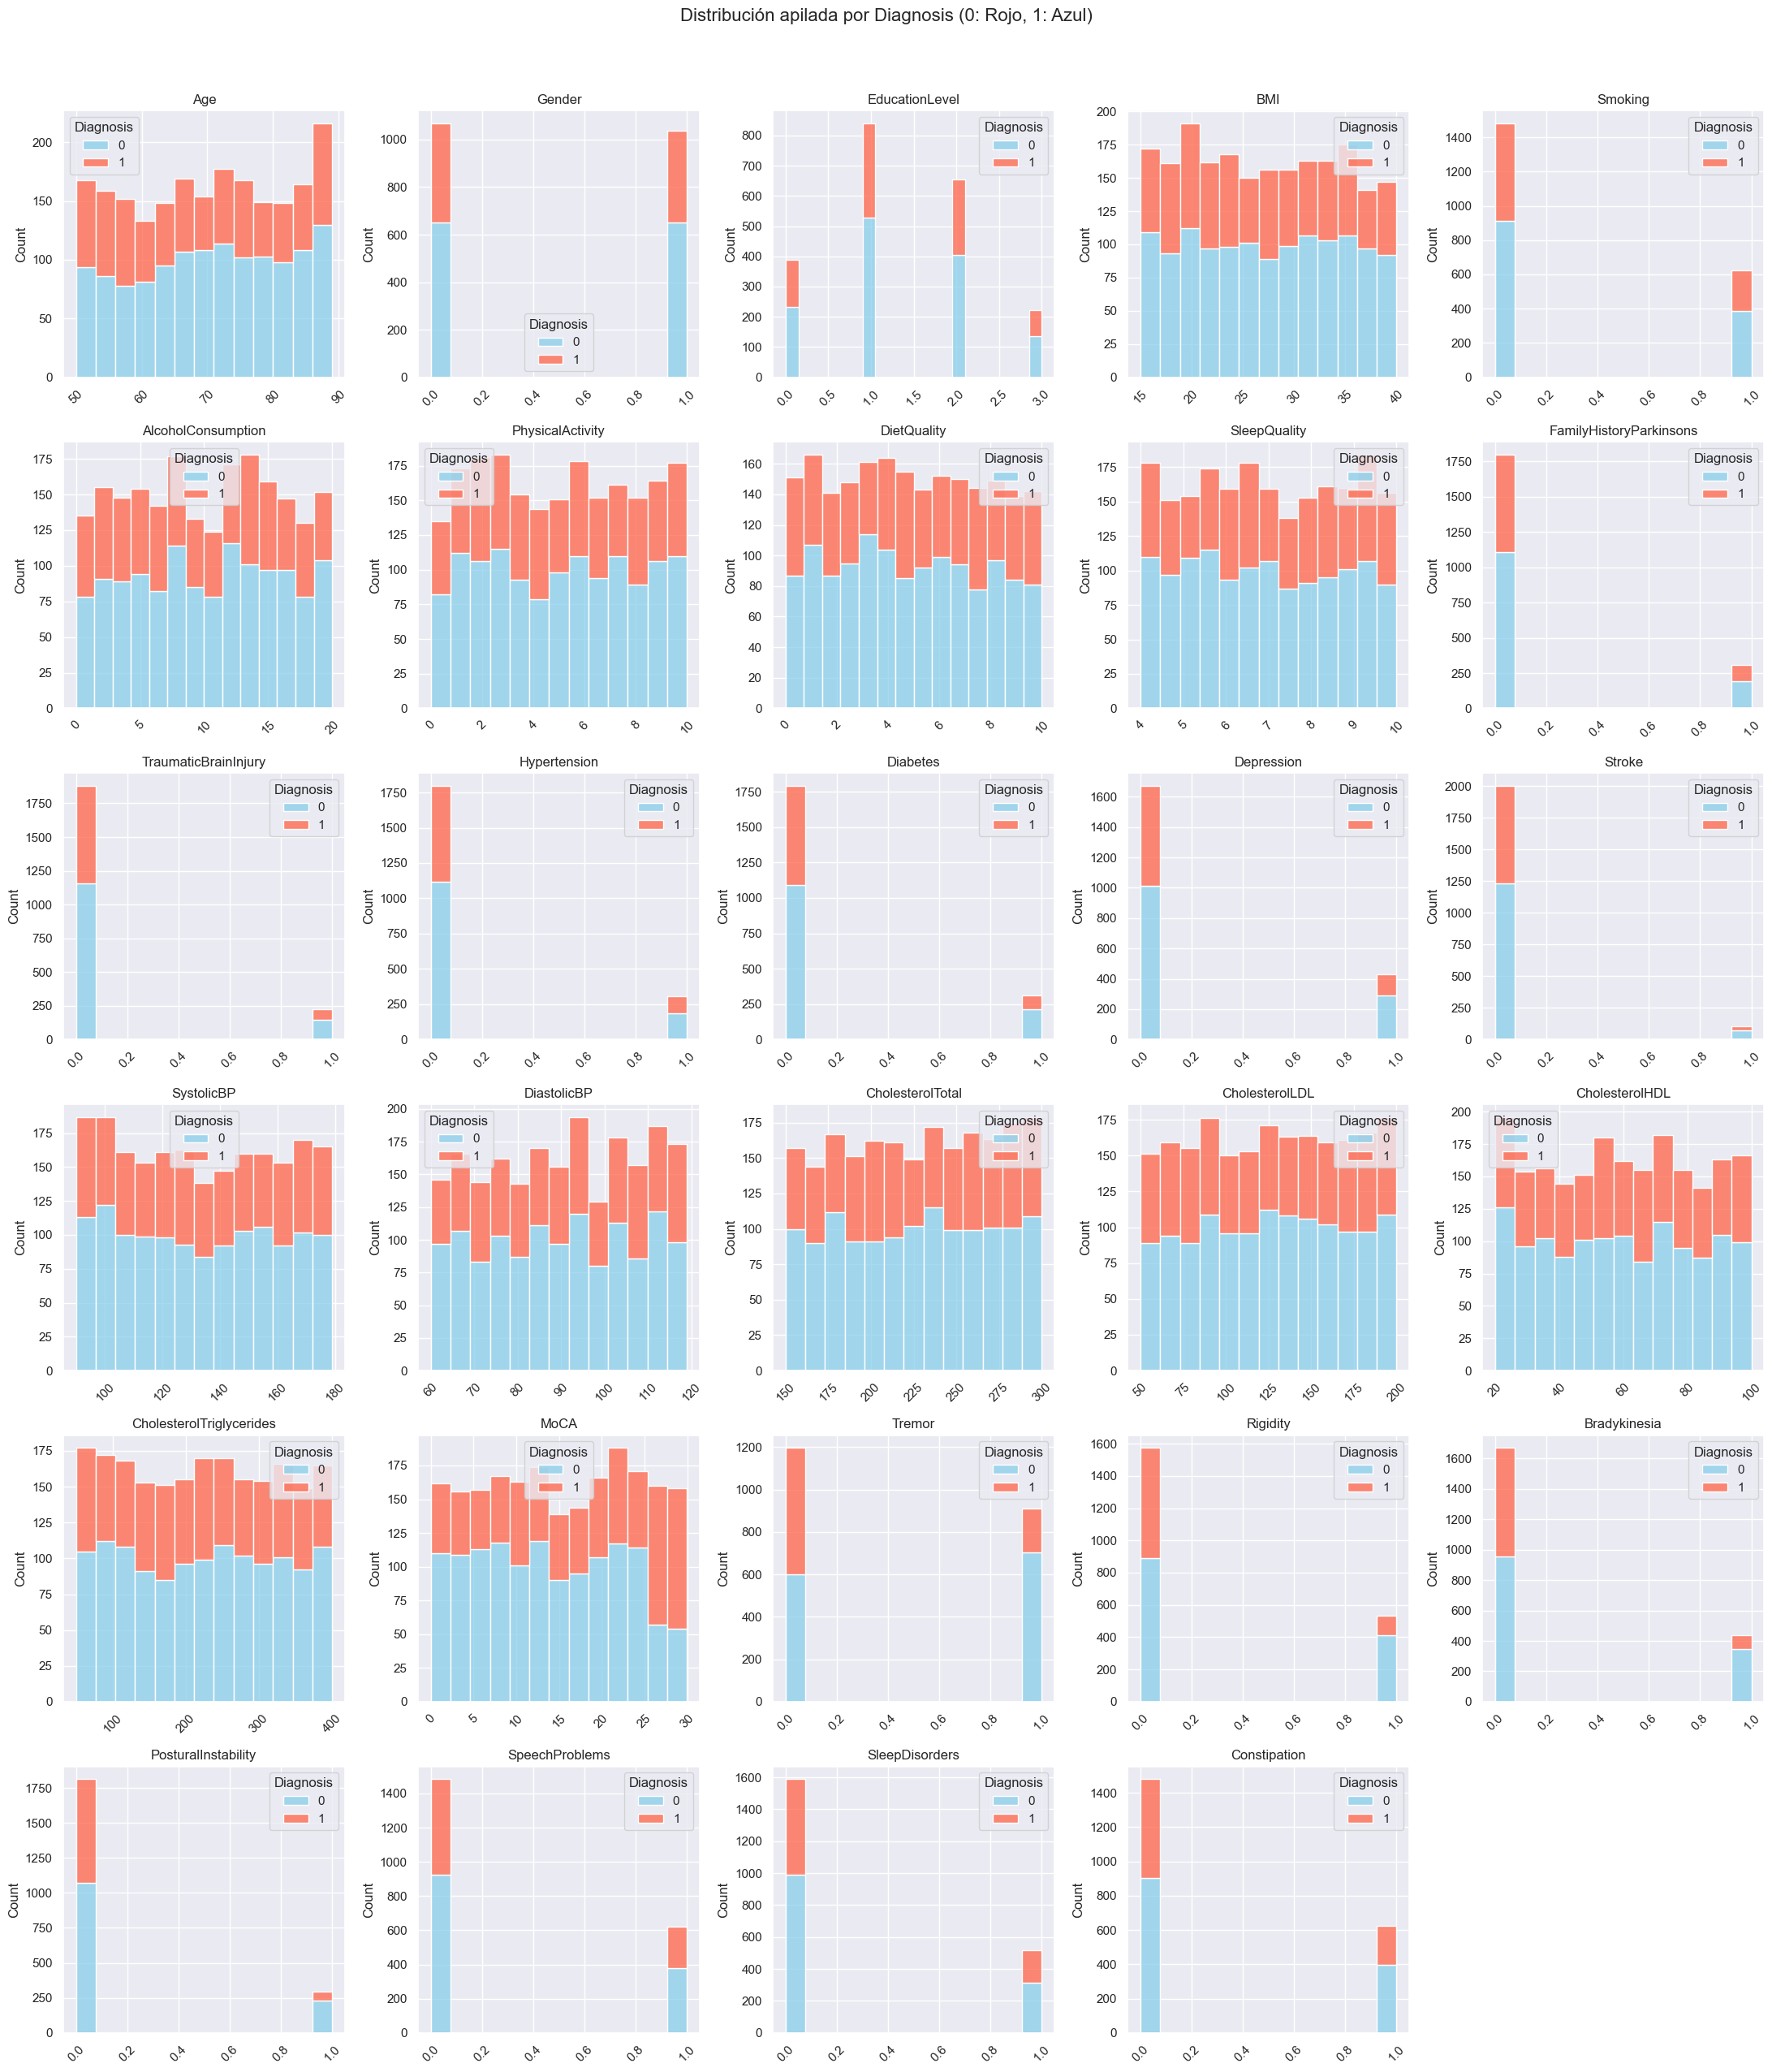

In [88]:
# Suponiendo que 'data' es tu DataFrame con 30 columnas
plot_stacked_histograms(data, cols_per_row=5, figsize=(22, 25))

In [89]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in data[num_cols].columns:
    print(col, check_outlier(data, col))
    if check_outlier(data, col):
        replace_with_thresholds(data, col)

Age False
BMI False
AlcoholConsumption False
PhysicalActivity False
DietQuality False
SleepQuality False
SystolicBP False
DiastolicBP False
CholesterolTotal False
CholesterolLDL False
CholesterolHDL False
CholesterolTriglycerides False
MoCA False


In [90]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 2105
Variables: 30
cat_cols: 17
num_cols: 13
cat_but_car: 0
num_but_cat: 17


In [91]:
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MoCA,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,0.897,0,1,0.185,0,0.255,0.138,0.390,0.881,0,0,0,0,0,0,0.438,0.000,0.486,0.654,0.223,0.821,0.974,1,0,0,0,0,0,0,0
1,0.641,0,2,0.050,1,0.301,0.841,0.852,0.267,0,0,0,0,0,0,0.820,0.271,0.403,0.692,0.715,0.613,0.411,0,1,0,1,0,1,0,1
2,0.513,1,0,0.014,0,0.112,0.021,0.650,0.988,0,0,0,1,0,0,0.258,0.559,0.916,0.458,0.820,0.988,0.999,1,0,0,0,1,0,1,1
3,0.051,0,0,0.018,0,0.300,0.137,0.672,0.033,0,0,0,0,0,0,0.629,0.305,0.869,0.575,0.398,0.892,0.711,1,1,1,0,0,0,1,1
4,0.949,0,1,0.144,0,0.489,0.119,0.466,0.894,0,0,0,0,0,0,0.281,0.576,0.894,0.390,0.063,0.285,0.278,0,0,0,1,0,1,0,0


<Axes: >

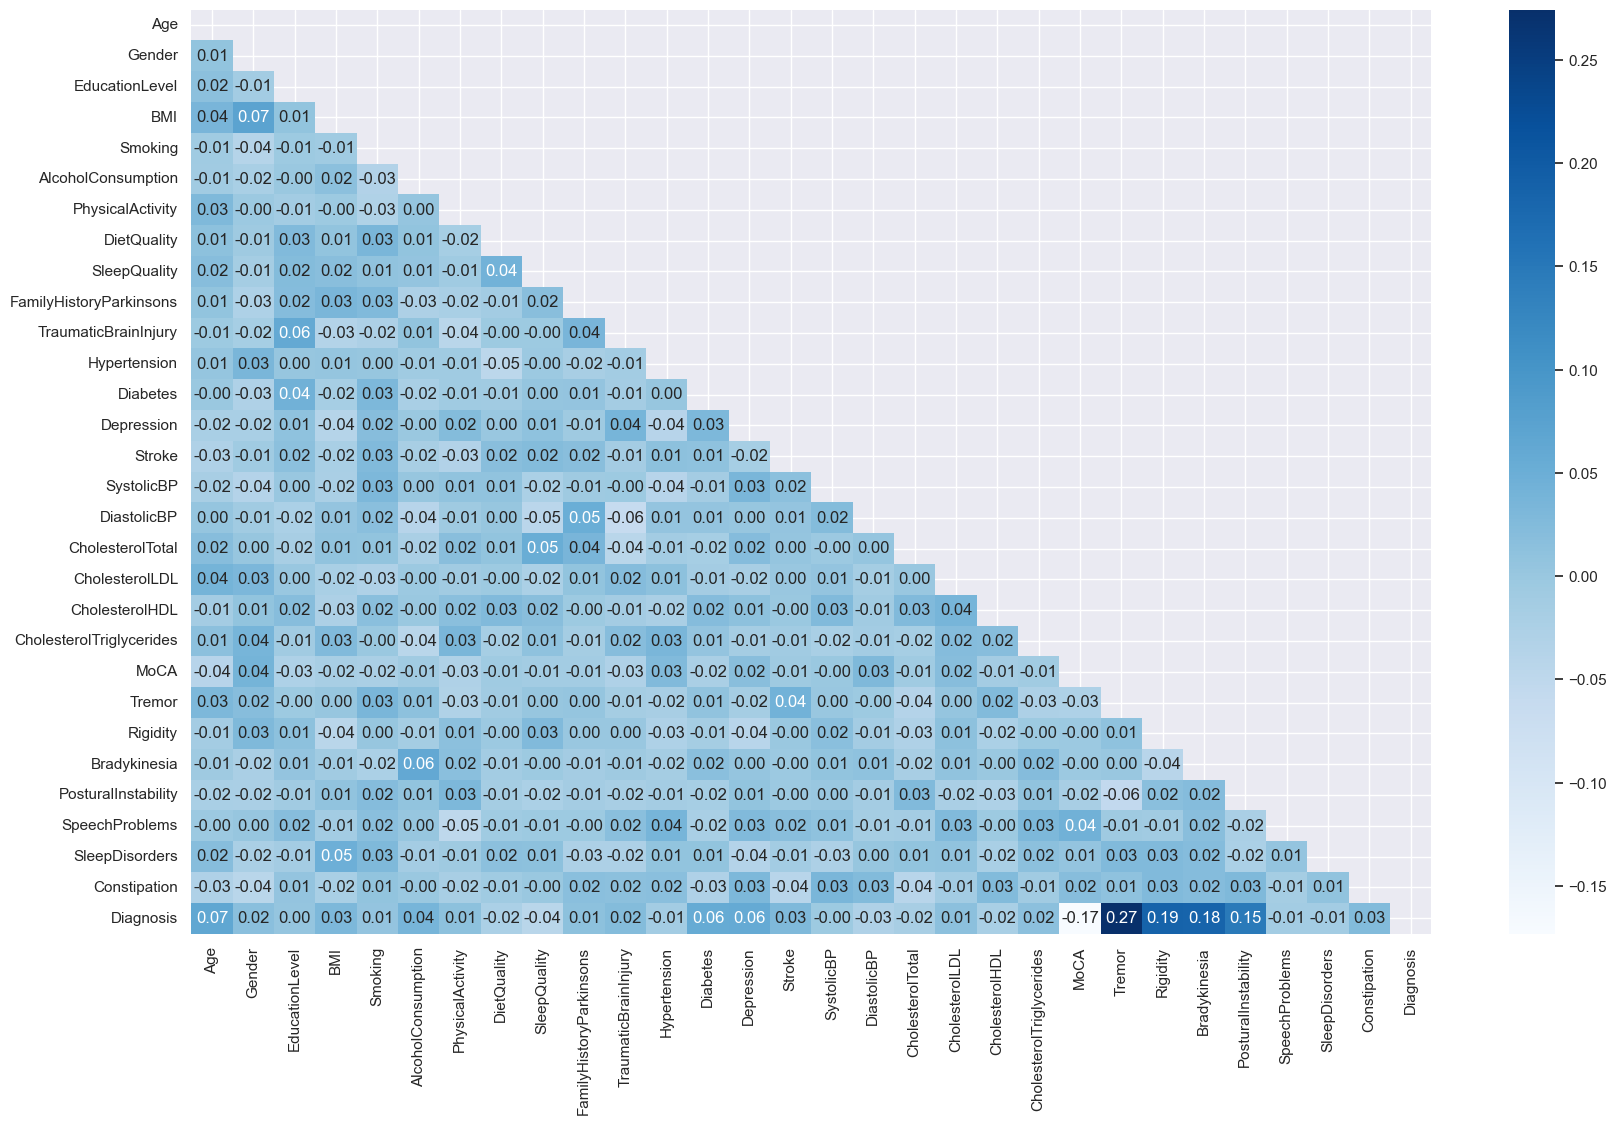

In [92]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (20, 12)})
sns.heatmap(corr, mask = mask, cmap="Blues", annot=True, fmt=".2f")

In [93]:
cat_cols.pop()

'Diagnosis'

# Modelo RandonForestC

In [94]:
y = data["Diagnosis"]
X = data.drop("Diagnosis", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [95]:
from sklearn.compose import ColumnTransformer


preprocessor=ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(handle_unknown='ignore'),cat_cols),
        ("scaler",MinMaxScaler(),num_cols)
    ],
    remainder="passthrough"
)

pipeline=Pipeline(
    [
        ("preprocessor",preprocessor),
        ("classifier",RandomForestClassifier(random_state=42))
    ]
)

In [96]:
param_grid = {
    'classifier__n_estimators': [100,200],  # Número de árboles
    'classifier__criterion': ["gini", "entropy"], 
    'classifier__min_samples_split': [2,10],  # Mínimo de muestras para dividir
    'classifier__min_samples_leaf': [2,4],   # Mínimo de muestras por hoja
    "classifier__max_features":["sqrt","log2"]
}

model=GridSearchCV(
    pipeline,
    param_grid,
    cv=10,
    scoring="balanced_accuracy",
    n_jobs=-1,
    refit=True
    )

model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'EducationLevel',
                                                                          'Smoking',
                                                                          'FamilyHistoryParkinsons',
                                                                          'TraumaticBrainInjury',
                                                                          'Hypertension',
                                                                          'Diabetes',
                                                                          'Depression',
                                                                          'Stroke',
                                                                          'Tremor',
                                                                          'Rigidity',
                                                                          'Bradykinesia',
                                                                          'PosturalInstabili...
                                                                          'CholesterolHDL',
                                                                          'CholesterolTriglycerides',
                                                                          'MoCA'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [2, 4],
                         'classifier__min_samples_split': [2, 10],
                         'classifier__n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [97]:
#Guardar el modelo
import pickle
import os 
import gzip

models_dir = '../file/models'
os.makedirs(models_dir, exist_ok=True)

# Nombre del archivo comprimido
compressed_model_path = "../file/models/model.pkl.gz"


with gzip.open(compressed_model_path, "wb") as file:
    pickle.dump(model, file)

In [98]:
#Métricas de precisión

import json
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

def calculate_and_save_metrics(model, X_train, X_test, y_train, y_test):
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas para el conjunto de entrenamiento
    metrics_train = {
        'type': 'metrics',
        'dataset': 'train',
        'precision': precision_score(y_train, y_train_pred, zero_division=0),
        'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred, zero_division=0),
        'f1_score': f1_score(y_train, y_train_pred, zero_division=0)
    }

    # Calcular métricas para el conjunto de prueba
    metrics_test = {
        'type': 'metrics',
        'dataset': 'test',
        'precision': precision_score(y_test, y_test_pred, zero_division=0),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_test_pred, zero_division=0)
    }

    # Crear carpeta si no existe
    output_dir = '../file/output'
    os.makedirs(output_dir, exist_ok=True)

    # Guardar las métricas en un archivo JSON
    output_path = os.path.join(output_dir, 'metrics.json')
    with open(output_path, 'w') as f:  # Usar 'w' para comenzar con un archivo limpio
        f.write(json.dumps(metrics_train) + '\n')
        f.write(json.dumps(metrics_test) + '\n')

In [99]:
from sklearn.metrics import confusion_matrix

# Función para calcular las matrices de confusión y guardarlas
def calculate_and_save_confusion_matrices(model, X_train, X_test, y_train, y_test):
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular matrices de confusión
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Convertir las matrices de confusión en formato JSON
    def format_confusion_matrix(cm, dataset_type):
        return {
            'type': 'cm_matrix',
            'dataset': dataset_type,
            'true_0': {
                'predicted_0': int(cm[0, 0]),
                'predicted_1': int(cm[0, 1])
            },
            'true_1': {
                'predicted_0': int(cm[1, 0]),
                'predicted_1': int(cm[1, 1])
            }
        }

    metrics = [
        format_confusion_matrix(cm_train, 'train'),
        format_confusion_matrix(cm_test, 'test')
    ]

    # Guardar las matrices de confusión en el mismo archivo JSON
    output_path = '../files/output/metrics.json'
    with open(output_path, 'a') as f:  # Usar 'a' para agregar después de las métricas
        for metric in metrics:
            f.write(json.dumps(metric) + '\n')

# Función principal para ejecutar todo
def main(model, X_train, X_test, y_train, y_test):
    # Crear el directorio de salida si no existe
    import os
    os.makedirs('../files/output', exist_ok=True)

    # Calcular y guardar las métricas
    calculate_and_save_metrics(model, X_train, X_test, y_train, y_test)

    # Calcular y guardar las matrices de confusión
    calculate_and_save_confusion_matrices(model, X_train, X_test, y_train, y_test)


main(model, X_train, X_test, y_train, y_test)

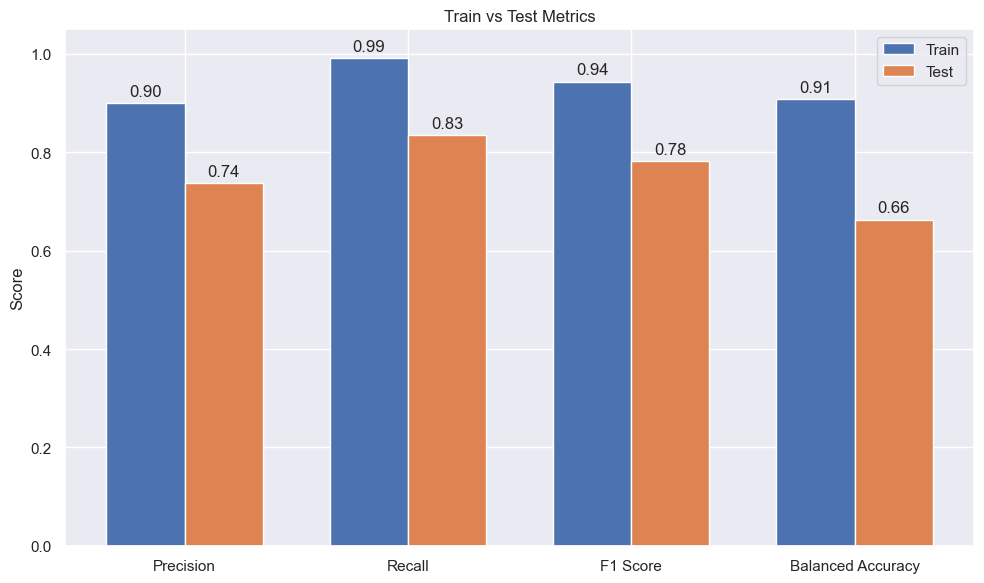

In [100]:
import matplotlib.pyplot as plt

def plot_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Precision': [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)],
        'Recall': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)],
        'F1 Score': [f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)],
        'Balanced Accuracy': [balanced_accuracy_score(y_train, y_train_pred), balanced_accuracy_score(y_test, y_test_pred)]
    }

    labels = list(metrics.keys())
    train_scores = [m[0] for m in metrics.values()]
    test_scores = [m[1] for m in metrics.values()]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10,6))
    bars1 = ax.bar(x - width/2, train_scores, width, label='Train')
    bars2 = ax.bar(x + width/2, test_scores, width, label='Test')

    ax.set_ylabel('Score')
    ax.set_title('Train vs Test Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([0, 1.05])
    ax.legend()

    # Agregar etiquetas en las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_metrics(model, X_train, X_test, y_train, y_test)


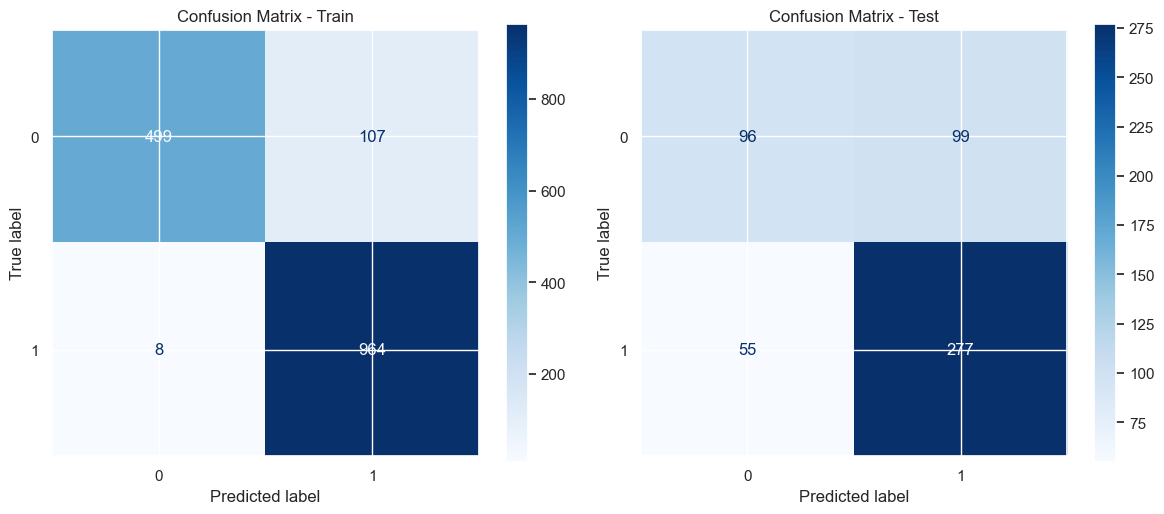

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrices(model, X_train, X_test, y_train, y_test):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, ax=axs[0], cmap='Blues')
    axs[0].set_title("Confusion Matrix - Train")

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[1], cmap='Blues')
    axs[1].set_title("Confusion Matrix - Test")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(model, X_train, X_test, y_train, y_test)


# Modelo CatBoost

In [77]:

cbc = CatBoostClassifier(verbose=0, random_state=42)

# Hiperparámetros para RandomizedSearchCV
param_dist = {
    'iterations': [None,100, 200, 250],
    'learning_rate': [0.001,0.005,0.01],
    'depth': [None,5, 6, 8, 10],
    'l2_leaf_reg': [None,1,2, 3,4, 5],
    'border_count': [None,32, 64, 128]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cbc,
    param_distributions=param_dist,
    n_iter=10,
    scoring='balanced_accuracy',
    cv=10,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

# Guardar modelo CBC
modelo_cbc_path = "../file/models/modeloCBC.pkl.gz"
with gzip.open(modelo_cbc_path, "wb") as file:
    pickle.dump(random_search, file)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [102]:
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        'dataset': 'train',
        'precision': precision_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred),
        'f1_score': f1_score(y_train, y_train_pred),
        'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred)
    }

    metrics_test = {
        'dataset': 'test',
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1_score': f1_score(y_test, y_test_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred)
    }

    return metrics_train, metrics_test

def save_metrics_json(metrics_train, metrics_test, path='../file/output/metrics_cbc.json'):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w') as f:
        json.dump([metrics_train, metrics_test], f, indent=4)

def plot_metrics(metrics_train, metrics_test):
    labels = list(metrics_train.keys())[1:]  # Ignorar 'dataset'
    train_scores = [metrics_train[label] for label in labels]
    test_scores = [metrics_test[label] for label in labels]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_scores, width, label='Train')
    plt.bar(x + width/2, test_scores, width, label='Test')
    plt.ylabel('Score')
    plt.title('Comparación de métricas - CatBoostClassifier')
    plt.xticks(x, labels)
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


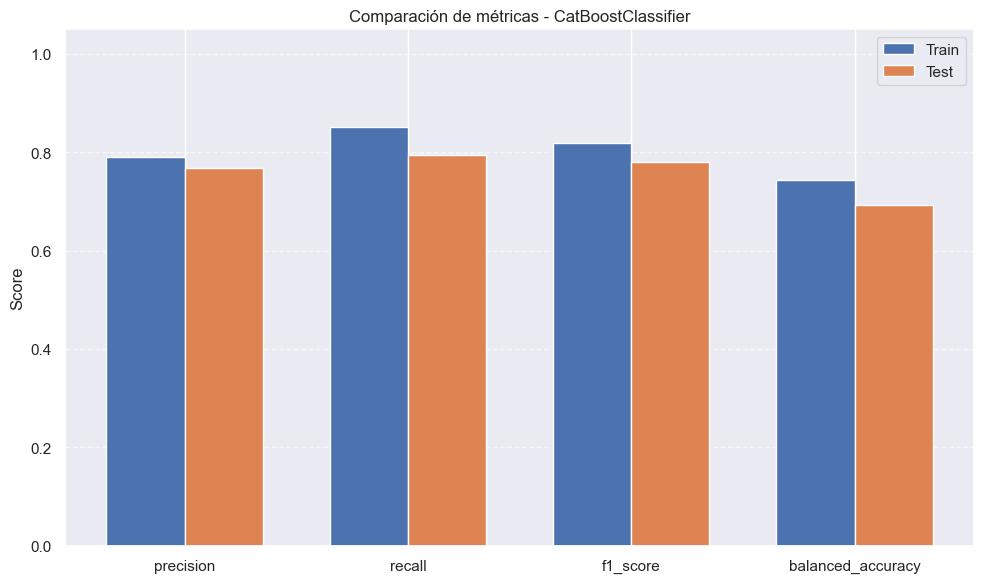

In [103]:
# Ejecutar evaluación
metrics_train_cbc, metrics_test_cbc = calculate_metrics(random_search, X_train, X_test, y_train, y_test)
save_metrics_json(metrics_train_cbc, metrics_test_cbc)
plot_metrics(metrics_train_cbc, metrics_test_cbc)


In [104]:
random_search.best_params_

{'learning_rate': 0.005,
 'l2_leaf_reg': None,
 'iterations': 250,
 'depth': 5,
 'border_count': 128}